<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# Redes Neurais Artificiais: Preço de Casas em Boston

[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

## Importação das bibliotecas

In [1]:
# Pacotes de preparação dos dados
import numpy as np
import pandas as pd
import scipy

# Pacotes gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos de Modelagem
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

# Funções customizadas
import preditiva

## Importação da base de dados

In [2]:
df = pd.read_csv('house_prices_train.csv')
df = df[[
    'MSSubClass','HouseStyle','LotArea','TotalBsmtSF',
    '1stFlrSF', '2ndFlrSF','OverallCond','SalePrice']]
df.head()

,MSSubClass,HouseStyle,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,OverallCond,SalePrice
0,60,2Story,8450,856,856,854,5,208500
1,20,1Story,9600,1262,1262,0,8,181500
2,60,2Story,11250,920,920,866,5,223500
3,70,2Story,9550,756,961,756,5,140000
4,60,2Story,14260,1145,1145,1053,5,250000


### Metadados
house_data_description.txt

## Preparação dos Dados

### Missing Values

In [3]:
df.isnull().sum()

MSSubClass     0
HouseStyle     0
LotArea        0
TotalBsmtSF    0
1stFlrSF       0
2ndFlrSF       0
OverallCond    0
SalePrice      0
dtype: int64

### Duplicações

In [4]:
df.duplicated().sum()

1

In [5]:
df.loc[df.duplicated(keep=False)]

,MSSubClass,HouseStyle,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,OverallCond,SalePrice
145,160,2Story,2522,970,970,739,5,130000
193,160,2Story,2522,970,970,739,5,130000


### Tipos de Variáveis

In [6]:
df.head(2)

,MSSubClass,HouseStyle,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,OverallCond,SalePrice
0,60,2Story,8450,856,856,854,5,208500
1,20,1Story,9600,1262,1262,0,8,181500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MSSubClass   1460 non-null   int64 
 1   HouseStyle   1460 non-null   object
 2   LotArea      1460 non-null   int64 
 3   TotalBsmtSF  1460 non-null   int64 
 4   1stFlrSF     1460 non-null   int64 
 5   2ndFlrSF     1460 non-null   int64 
 6   OverallCond  1460 non-null   int64 
 7   SalePrice    1460 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 91.4+ KB


In [8]:
# Conversão de variáveis numéricas em categóricas
df['MSSubClass'] = df['MSSubClass'].astype(object)
df['OverallCond'] = df['OverallCond'].astype(object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MSSubClass   1460 non-null   object
 1   HouseStyle   1460 non-null   object
 2   LotArea      1460 non-null   int64 
 3   TotalBsmtSF  1460 non-null   int64 
 4   1stFlrSF     1460 non-null   int64 
 5   2ndFlrSF     1460 non-null   int64 
 6   OverallCond  1460 non-null   object
 7   SalePrice    1460 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 91.4+ KB


## Análise Exploratória dos Dados

### Dispersão com Regressão

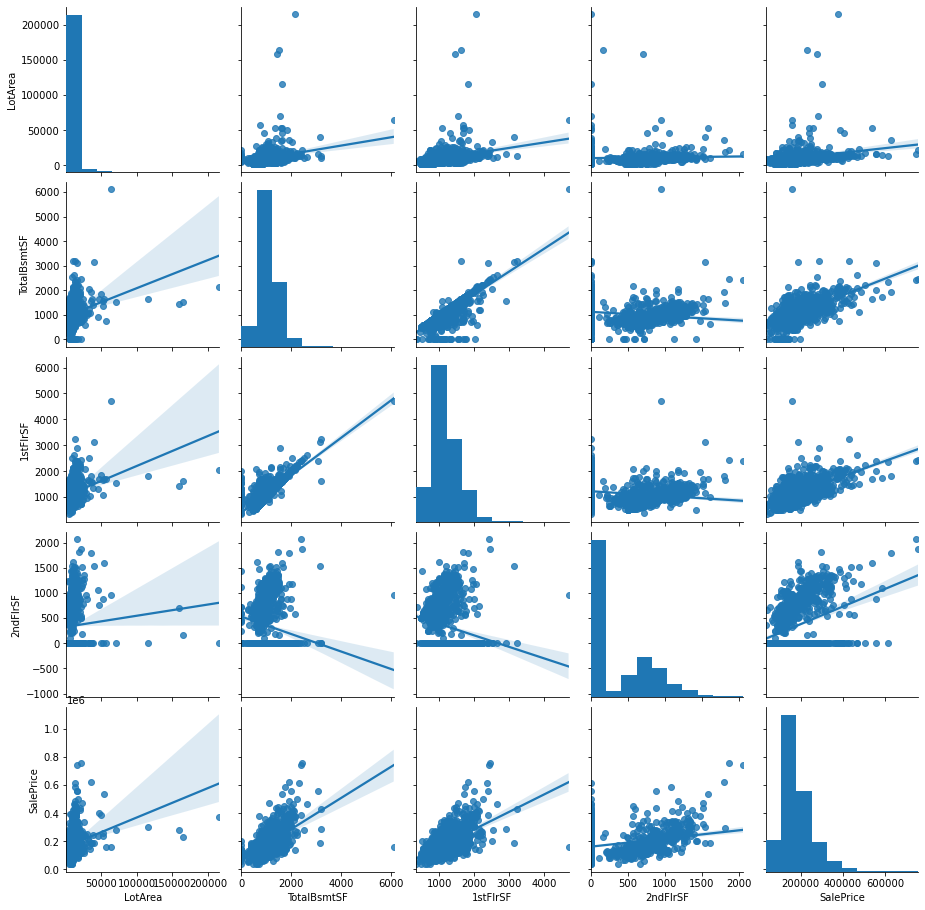

In [10]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

sns.pairplot(df.drop(['MSSubClass','HouseStyle','OverallCond'], axis=1),
             kind='reg');

### Relatórios Pandas Profiling e SweetViz

In [11]:
perfil_pp, perfil_sv = preditiva.gera_relatorios_aed(df=df,
                                                     target_feat='SalePrice')
sns.reset_defaults()

:TARGET::                          |██▎                  | [ 11%]   00:00  -> (00:00 left)

:FEATURES DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report base_aed_sv.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Desenvolvimento dos Modelos
Para desenvolvermos as Redes Neurais Artificiais utilizaremos uma das bibliotecas mais populares: [Tensorflow](https://www.tensorflow.org/?hl=pt-br)

### Definição do *Target* e das *Features*

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MSSubClass   1460 non-null   object
 1   HouseStyle   1460 non-null   object
 2   LotArea      1460 non-null   int64 
 3   TotalBsmtSF  1460 non-null   int64 
 4   1stFlrSF     1460 non-null   int64 
 5   2ndFlrSF     1460 non-null   int64 
 6   OverallCond  1460 non-null   object
 7   SalePrice    1460 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 91.4+ KB


In [13]:
# Target (variável resposta)
y_var = 'SalePrice'
y = df[[y_var]]

# Features (variáveis explicativas)
# Variáveis Numéricas
x_var_num = [
    'LotArea', 'TotalBsmtSF',
    '1stFlrSF', '2ndFlrSF'
    ]
x_num = df[x_var_num].to_numpy()

# Variáveis Categóricas / Qualitativas
x_var_cat = ['MSSubClass', 'HouseStyle', 'OverallCond']
x_cat = df[x_var_cat]

### Pré-processamento

In [14]:
# Criação das variáveis dummies para variáveis categóricas
x_cat_enc = OneHotEncoder()
x_cat = x_cat_enc.fit_transform(x_cat).toarray()

# Unificação da base de dados
x = np.concatenate([x_num, x_cat], axis=1)

In [15]:
x

array([[8.450e+03, 8.560e+02, 8.560e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [9.600e+03, 1.262e+03, 1.262e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.125e+04, 9.200e+02, 9.200e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [9.042e+03, 1.152e+03, 1.188e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [9.717e+03, 1.078e+03, 1.078e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [9.937e+03, 1.256e+03, 1.256e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

### Divisão das bases em Treino e Teste

In [16]:
# Divisão em treino e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30,
                                                    random_state=42)

### Padronização da Escala

In [17]:
# Padronização da Escala usando conjunto de treino
x_scaler = StandardScaler()
x_scaler.fit(x_train)
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

y_scaler = StandardScaler()
y_scaler.fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [18]:
x_train_scaled.shape

(1022, 36)

### Definição da RNA MLP

In [51]:
model = keras.Sequential()

# Camada 1
model.add(layers.Dense(16, 
                       activation='tanh', 
                       kernel_regularizer=keras.regularizers.l1_l2(),
                       input_dim=x_train_scaled.shape[1]))

# Camada 2
model.add(layers.Dense(32,
                       activation='relu', 
                       kernel_regularizer=keras.regularizers.l1_l2()))

# Camada Saída
model.add(layers.Dense(1, activation='relu'))

# Compilação do Modelo
model.compile(loss='mean_squared_error', 
              optimizer=keras.optimizers.Adam(),
              #metrics=keras.metrics.RootMeanSquaredError(name='rmse'))
              metrics=tfa.metrics.RSquare(name='r2', dtype=tf.float32, y_shape=(1,)))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                592       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


### Avaliação da RNA antes do treinamento

In [52]:
score_train, metric_train = model.evaluate(x_train_scaled, y_train_scaled, verbose=0)
score_test, metric_test = model.evaluate(x_test_scaled, y_test_scaled, verbose=0)

print('R² no conjunto de Treino: {:,.2f}'.format(metric_train))
print('R² no conjunto de Teste: {:,.2f}'.format(metric_test))

R² no conjunto de Treino: -0.04
R² no conjunto de Teste: -0.04


In [53]:
# Predições
y_train_pred = y_scaler.inverse_transform(model.predict(x_train_scaled))
y_test_pred = y_scaler.inverse_transform(model.predict(x_test_scaled))

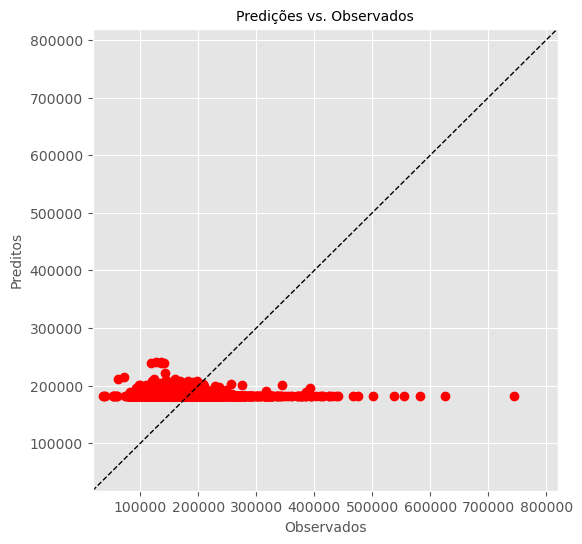

In [54]:
# Conjunto de Treino
preditiva.dispersao_modelo(y_train, y_train_pred)

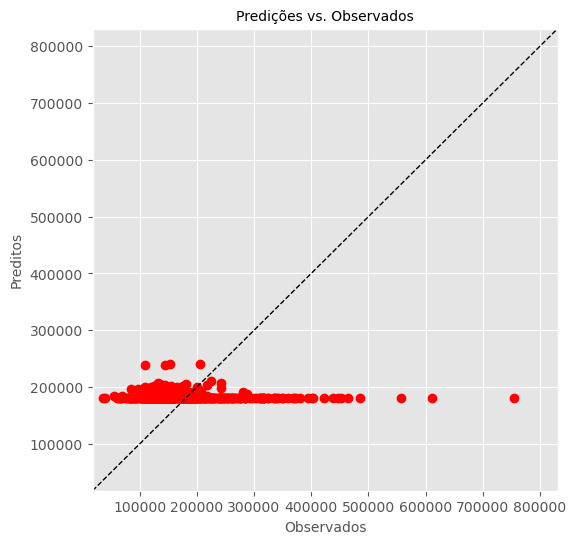

In [55]:
# Conjunto de Teste
preditiva.dispersao_modelo(y_test, y_test_pred)

### Treinamento da RNA MLP

In [56]:
rna_es = keras.callbacks.EarlyStopping(
    monitor="val_r2",
    min_delta=0.005,
    patience = 20,
    verbose=1,
    mode='max',
    restore_best_weights=True)

historico = model.fit(x=x_train_scaled, 
                      y=y_train_scaled,
                      epochs=500,
                      batch_size=32,
                      validation_split=0.2,
                      callbacks=rna_es)

Epoch 1/500
26/26 [==============================] - 1s 12ms/step - loss: 3.2634 - r2: -0.0117 - val_loss: 2.9253 - val_r2: -0.0096
Epoch 2/500
26/26 [==============================] - 0s 10ms/step - loss: 2.9522 - r2: -0.0014 - val_loss: 2.6242 - val_r2: -0.0033
Epoch 3/500
26/26 [==============================] - 0s 10ms/step - loss: 2.6638 - r2: 5.5653e-04 - val_loss: 2.3338 - val_r2: 0.0163
Epoch 4/500
26/26 [==============================] - 0s 9ms/step - loss: 2.3468 - r2: 0.0603 - val_loss: 2.0621 - val_r2: 0.0657
Epoch 5/500
26/26 [==============================] - 0s 10ms/step - loss: 2.0549 - r2: 0.1415 - val_loss: 1.7576 - val_r2: 0.2026
Epoch 6/500
26/26 [==============================] - 0s 9ms/step - loss: 1.7068 - r2: 0.3186 - val_loss: 1.4674 - val_r2: 0.3717
Epoch 7/500
26/26 [==============================] - 0s 9ms/step - loss: 1.4755 - r2: 0.4078 - val_loss: 1.2866 - val_r2: 0.4288
Epoch 8/500
26/26 [==============================] - 0s 9ms/step - loss: 1.3175 - r2:

### Análise de Desempenho

In [57]:
score, r2_train = model.evaluate(x_train_scaled, y_train_scaled, verbose=0)
score, r2_test = model.evaluate(x_test_scaled, y_test_scaled, verbose=0)

print('R² no conjunto de Treino: {:,.2f}'.format(r2_train))
print('R² no conjunto de Teste: {:,.2f}'.format(r2_test))

R² no conjunto de Treino: 0.50
R² no conjunto de Teste: 0.53


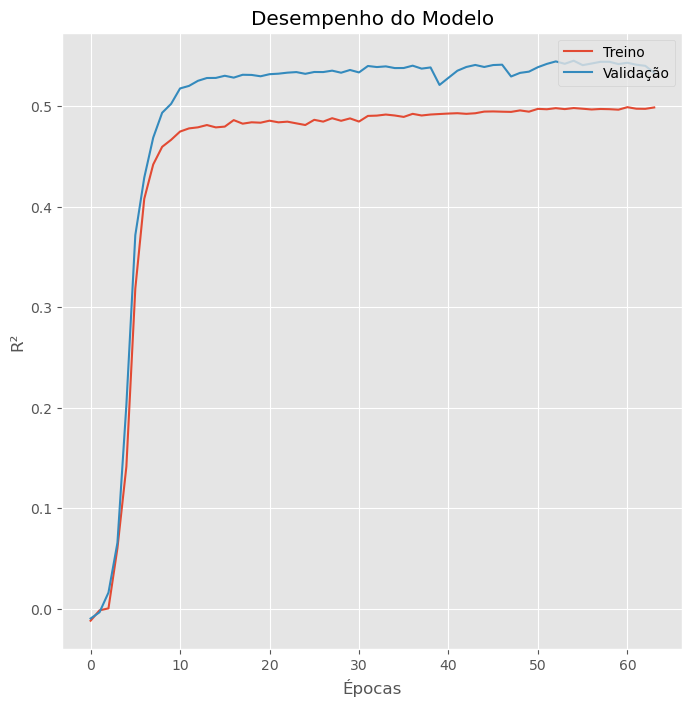

In [58]:
rmse_treino = list(historico.history.keys())[1]
rmse_valid = list(historico.history.keys())[3]

# Gráfico com a evolução do treinamento
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(historico.history[rmse_treino])
plt.plot(historico.history[rmse_valid])
plt.title('Desempenho do Modelo')
plt.ylabel('R²')
plt.xlabel('Épocas')
plt.legend(['Treino', 'Validação'], loc='upper right')
plt.show()

In [59]:
# Predições
y_train_pred = y_scaler.inverse_transform(model.predict(x_train_scaled))
y_test_pred = y_scaler.inverse_transform(model.predict(x_test_scaled))

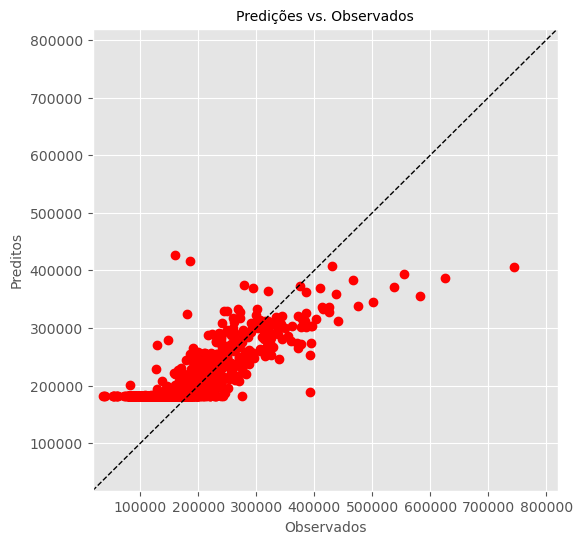

In [60]:
# Conjunto de Treino
preditiva.dispersao_modelo(y_train, y_train_pred)

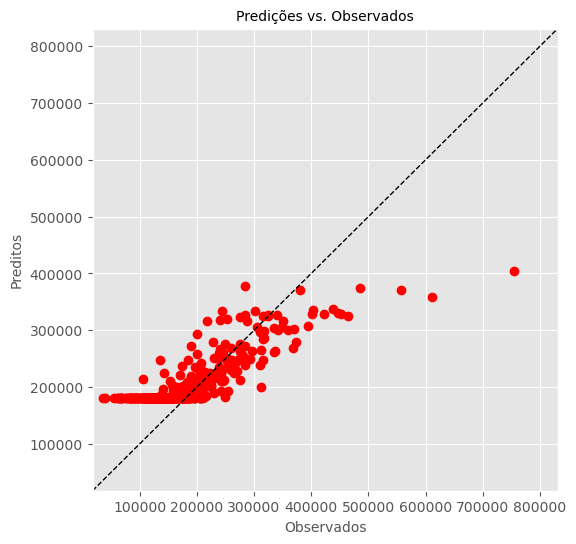

In [61]:
# Conjunto de Teste
preditiva.dispersao_modelo(y_test, y_test_pred)